In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

base_model = InceptionV3(weights='imagenet', include_top=False)


for layer in base_model.layers[-20:]:
    layer.trainable = False

Dmodel = models.Sequential()

Dmodel.add(base_model)

Dmodel.add(layers.GlobalAveragePooling2D())  
Dmodel.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01))) 
Dmodel.add(layers.Dropout(0.5)) 
Dmodel.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01))) 
Dmodel.add(layers.Dropout(0.5))  
Dmodel.add(layers.Dense(5, activation='softmax'))  

Dmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


Dmodel.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, None, None, 2048)    │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,073,637 (84.20 MB)

 Trainable params: 20,103,845 (76.69 MB)

 Non-trainable params: 1,969,792 (7.51 MB)

In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def load_and_preprocess_images(image_dir):
    images = []
    labels = []
    
    for person_dir in os.listdir(image_dir):
        person_path = os.path.join(image_dir, person_dir)
        
        if os.path.isdir(person_path):
            print(f"Found directory: {person_dir}")  
            
            for filename in os.listdir(person_path):
                if filename.endswith(('.png', '.jpg', '.jpeg','.jfif')): 
                    img_path = os.path.join(person_path, filename)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    images.append(img_array)  
                    labels.append(person_dir)  
                else:
                    print(f"Skipped non-image file: {filename}") 

    return np.array(images), np.array(labels)  

image_dir = r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset"
print("Looking for images in:", image_dir)

images, labels = load_and_preprocess_images(image_dir)


if images.size > 0: 
    images = images / 255.0

unique_labels, y_encoded = np.unique(labels, return_inverse=True)
y_encoded_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(unique_labels))

x_train, x_test, y_train, y_test = train_test_split(images, y_encoded_one_hot, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


Looking for images in: C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset
Found directory: Adele
Found directory: Aliko dangote
Skipped non-image file: Image_60.JPG
Skipped non-image file: Image_69.webp
Found directory: donald trump
Found directory: elon musk
Skipped non-image file: Image_35.webp
Skipped non-image file: Image_69.webp
Skipped non-image file: Image_90.webp
Skipped non-image file: Image_96.webp
Found directory: mike tyson
Skipped non-image file: Image_87.webp
x_train shape: (403, 299, 299, 3), y_train shape: (403, 5)
x_test shape: (101, 299, 299, 3), y_test shape: (101, 5)


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 307s 19s/step - accuracy: 0.2267 - loss: 4.9794 - val_accuracy: 0.3861 - val_loss: 4.6326
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 324s 25s/step - accuracy: 0.4719 - loss: 4.5897 - val_accuracy: 0.4950 - val_loss: 4.3957
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 304s 23s/step - accuracy: 0.5872 - loss: 4.3262 - val_accuracy: 0.6436 - val_loss: 4.0887
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 285s 22s/step - accuracy: 0.6461 - loss: 4.0464 - val_accuracy: 0.8119 - val_loss: 3.8048
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 291s 23s/step - accuracy: 0.7488 - loss: 3.8525 - val_accuracy: 0.8515 - val_loss: 3.5598
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 276s 21s/step - accuracy: 0.8468 - loss: 3.5250 - val_accuracy: 0.9208 - val_loss: 3.4632
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 242s 19s/step - accuracy: 0.9005 - loss: 3.3432 - val_accuracy: 0.8812 - val_loss: 3.3250
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 251s 19s/step - accuracy: 0.9197 - loss: 3.2448 - val_accuracy: 0.

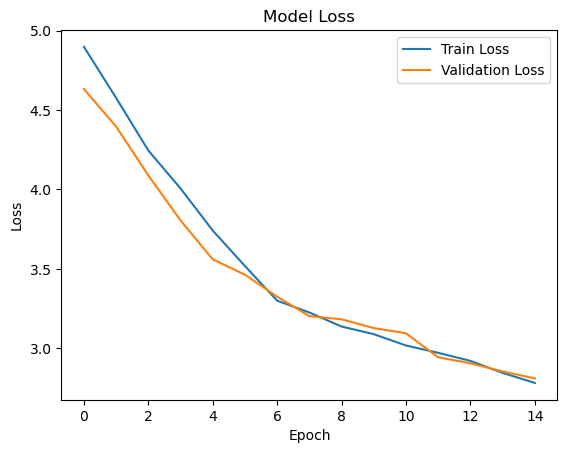

In [3]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = Dmodel.fit(x_train, y_train, 
                     epochs=15, 
                     validation_data=(x_test, y_test), 
                     callbacks=[early_stopping])


# Plot training and validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [4]:
test_loss, test_accuracy = Dmodel.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

4/4 - 19s - 5s/step - accuracy: 0.9802 - loss: 2.8105
Test Accuracy: 0.98


In [5]:
import os
from keras.preprocessing import image

def img_to_encoding(image_path, model):
    img = image.load_img(image_path, target_size=(299, 299))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0 
    encoding = model.predict(img_array)
    return encoding




In [16]:
import os
import numpy as np


def create_encodings(directories, model):
    encodings = {}
    for name, folder_path in directories.items():
        first_image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
        encodings[name] = img_to_encoding(first_image_path, model)
    return encodings

def recognize(image_path, encodings, model):
    encoding = img_to_encoding(image_path, model)
    min_dist = float('inf')
    identity = None

    for name, anchor_enc in encodings.items():
        dist = np.linalg.norm(encoding - anchor_enc)
        if dist < min_dist:
            min_dist = dist
            identity = name

    if min_dist > 0.003:  
        print("access denied.")
        identity = None
    else:
        print(f"It's {identity}, the distance is {min_dist}")

    return min_dist, identity

directories = {
    "Adele": r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset\Adele",
    "mike tyson": r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset\mike tyson",
    "elon musk": r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset\elon musk",
    "Donald trump": r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset\donald trump",
    "Aliko dangote": r"C:\Users\Garba Buhari\Desktop\face recognition and verification\dataset\Aliko dangote"
}

encodings = create_encodings(directories, Dmodel) 

image_path = r"C:\Users\Garba Buhari\Desktop\face recognition and verification\my boy.jfif"
min_dist, identity = recognize(image_path, encodings, Dmodel) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
It's Donald trump, the distance is 0.00013249192852526903


In [18]:
def verify(image_path_1, image_path_2, model):
    encoding_1 = img_to_encoding(image_path_1, model)
    encoding_2 = img_to_encoding(image_path_2, model)

    
    dist = np.linalg.norm(encoding_1 - encoding_2)

    
    if dist < 0.5:
        print(f"Same person! The distance is {dist}")
        return True
    else:
        print(f"Different people! The distance is {dist}")
        return False
image_path_1 = r"C:\Users\Garba Buhari\Desktop\face recognition and verification\Screenshot_20200908-222228.png"
image_path_2 = r"C:\Users\Garba Buhari\Desktop\face recognition and verification\Screenshot_20211011-153412.png"
is_same_person = verify(image_path_1, image_path_2, Dmodel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Same person! The distance is 0.49527209997177124
